### 다항 분포 (Multinormal distribution)

1) 정의 : 독립적인 카테고리 분포를 여러번 시도하여 얻은 각 원소의 성공횟수 값

2) 공식

[1] 공식

$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$

[2] 의미

$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

3) 모멘트

[1] 기대값

$$\text{E}[x_k] = N\theta_k$$

[2] 분산

$$\text{Var}[x_k] = N\theta_k(1-\theta_k)$$

In [1]:
# 다항 함수 구하기
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(0)
N = 30 # 30번을 1세트로
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4]) # 확률 부여
X = np.random.multinomial(N, theta, size=100) #100게임 *30번 = 3000번
X[:5] # 총 3000번을 던진거와 동일

array([[ 0,  0,  3,  6,  9, 12],
       [ 0,  0,  5,  9,  6, 10],
       [ 0,  0,  3,  9,  5, 13],
       [ 0,  0,  5,  7, 10,  8],
       [ 0,  0,  3,  8,  6, 13]])

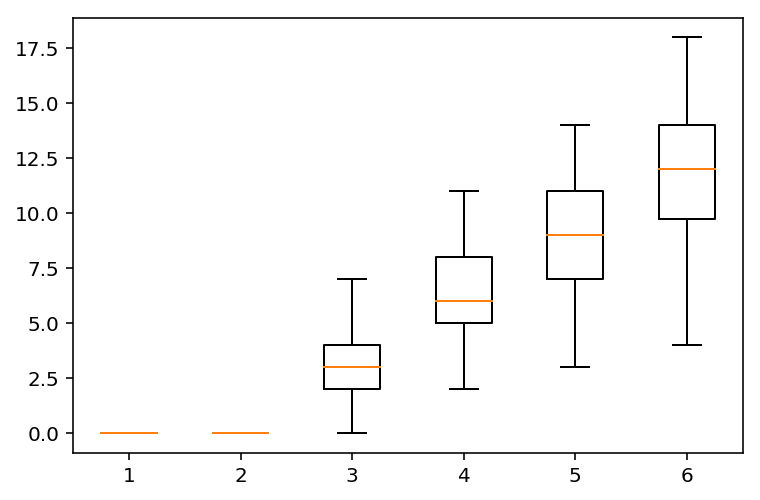

In [3]:
# 박스플롯 : https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/
plt.boxplot(X) # 표본의 수가 많으면 박스플롯이 유용
plt.show()

In [4]:
df = pd.DataFrame(X).stack().reset_index()
df.columns = ["trial", "class", "binomial"]
df

,trial,class,binomial
0,0,0,0
1,0,1,0
2,0,2,3
3,0,3,6
4,0,4,9
5,0,5,12
6,1,0,0
7,1,1,0
8,1,2,5
9,1,3,9


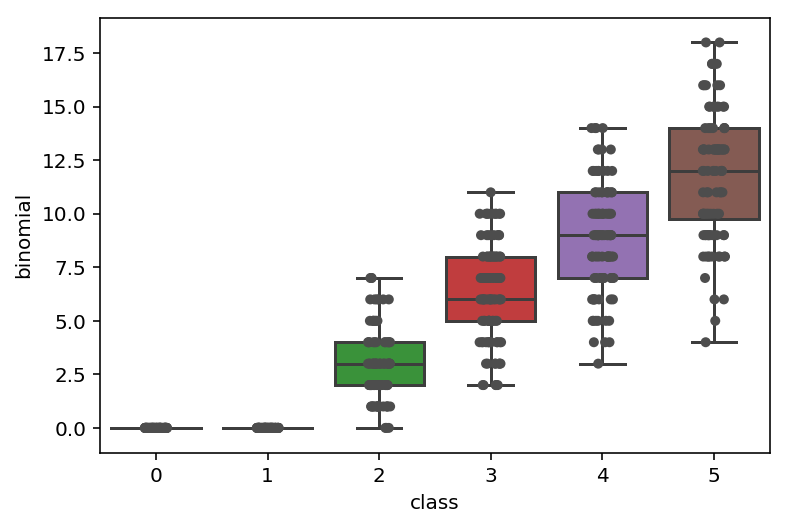

In [5]:
# 박스플롯
sns.boxplot(x="class", y="binomial", data=df)
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show() # jitter = True는 같은 위치의 데이터를 랜덤으로 흔들리게 해서 표시하게끔

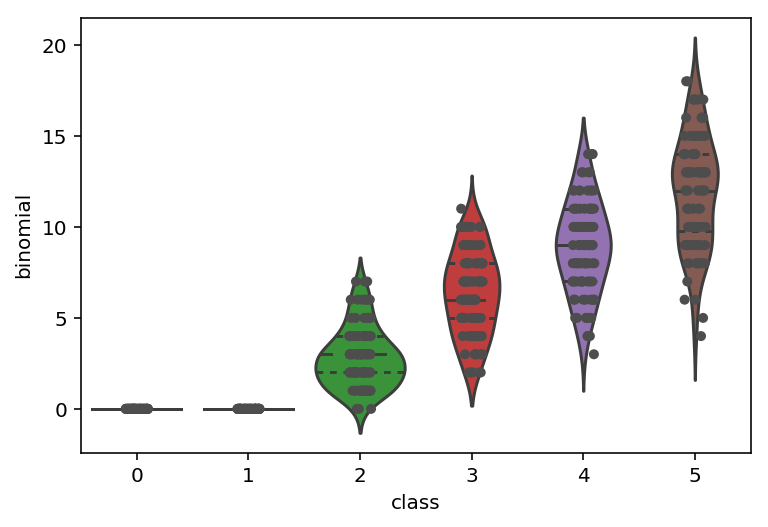

In [6]:
# 바이올린 플롯
sns.violinplot(x="class", y="binomial", data=df, inner="quartile")
sns.stripplot(x="class", y="binomial", data=df, jitter=True, color=".3")
plt.show()